In [33]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Read the csv file to load the data
df=pd.read_csv('https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv')

# Null values in the price column

In [2]:
# First calculate the percentage of null values in the Price column
null_percentage = df['Price'].isnull().sum() / len(df['Price']) * 100
print({'The percentage of null values for Price column is':null_percentage})

# Later drop the null values in the Price column
df = df.dropna(subset=['Price'])

# Last convert the Price column to integer 
df['Price'] = df['Price'].astype(int)

{'The percentage of null values for Price column is': 21.83205668875692}


# Most common type of property and its percentage of total

In [3]:
#First we find the most common property type by using mode
common_property_type = df['Type'].mode()[0]
print({'The most common property type is':common_property_type})

# Second we calculate the percentage that the most common property makes up
common_property_percentage = ((df['Type'].value_counts()[common_property_type] / len(df['Type'])) * 100).round(2)
print({'The percentage that the most common property makes up is':common_property_percentage})

{'The most common property type is': 'h'}
{'The percentage that the most common property makes up is': 67.79}


# Graph to show property types frequency

<Axes: xlabel='Type', ylabel='count'>

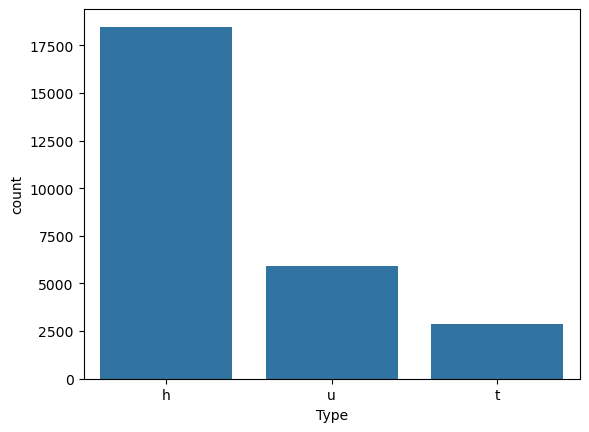

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot of the property types in descending order
sns.countplot(x='Type', data=df, order = df['Type'].value_counts().index)

# Relation between number of rooms and price

<Axes: xlabel='Rooms', ylabel='Price'>

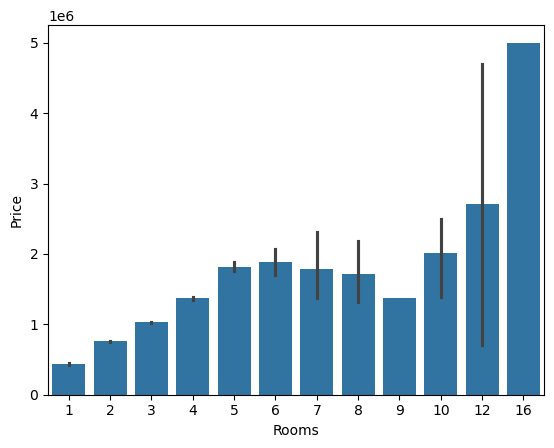

In [5]:
# Create a barplot to visualize the relation between the number of rooms and the price
sns.barplot(x='Rooms', y='Price', data=df)

# Spearman correlation for price and number of rooms

In [6]:
spearman_price_rooms = df['Rooms'].corr(df['Price'], method='spearman')
print({'The Spearman correlation between rooms and price is':spearman_price_rooms})

{'The Spearman correlation between Rooms and Price is': 0.5042971590926004}


# Correlation for price and distance from the CBD

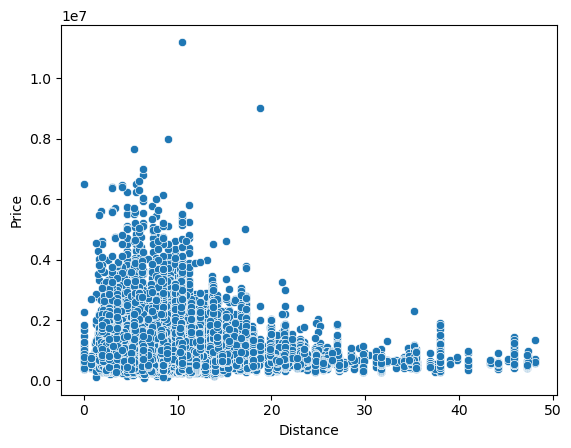

{'The correlation between Distance and Price is': -0.18809341092744206}


In [7]:
#Create a scatterplot to visualize the relation between the distance from CBD and the price
sns.scatterplot(x='Distance', y='Price', data=df)
plt.show()

# Calculate a correlation coefficient between distance and price (Choose Spearman because it is a non-lineal relation)
distance_price_correlation = df['Distance'].corr(df['Price'], method='spearman')
print({'The correlation between Distance and Price is':distance_price_correlation})

# Relation between property size and price

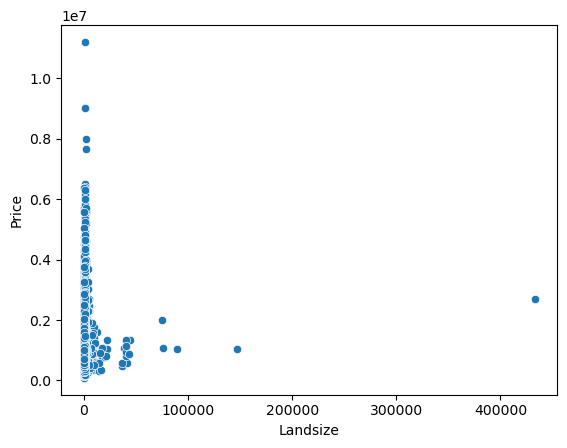

{'The correlation between Landsize and Price is': 0.2766120625869772}


In [9]:
# Calculate the relation between property size and price

# First we creat a scatterplot to visualize the relation between landsize and price
sns.scatterplot(x='Landsize', y='Price', data=df)
plt.show()

# Second we calculate the correlation between landsize and price with Spearman method as it is a non-lineal relation
landsize_price_correlation = df['Landsize'].corr(df['Price'], method='spearman')
print({'The correlation between landsize and price is':landsize_price_correlation})

# Barplot with categorized Landsize and test with differents q

<Axes: xlabel='Landsize_category', ylabel='Price'>

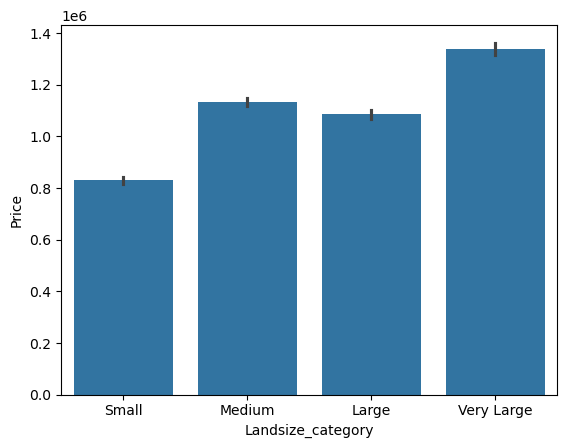

In [10]:
# First we categorize the property type into four groups
df['Landsize_category'] = pd.qcut(df['Landsize'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

# Create a barplot to visualize the relation between the property size category and the price
sns.barplot(x='Landsize_category', y='Price', data=df)

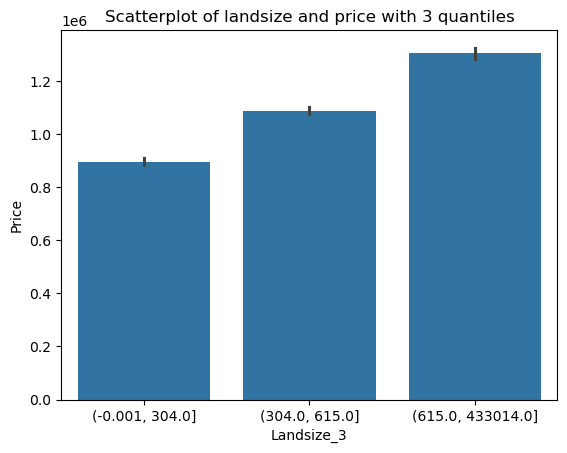

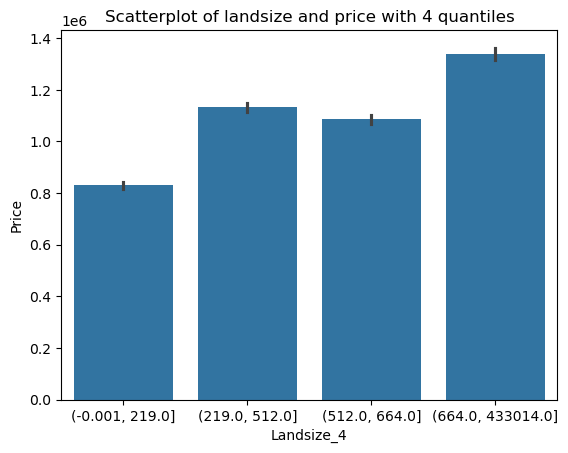

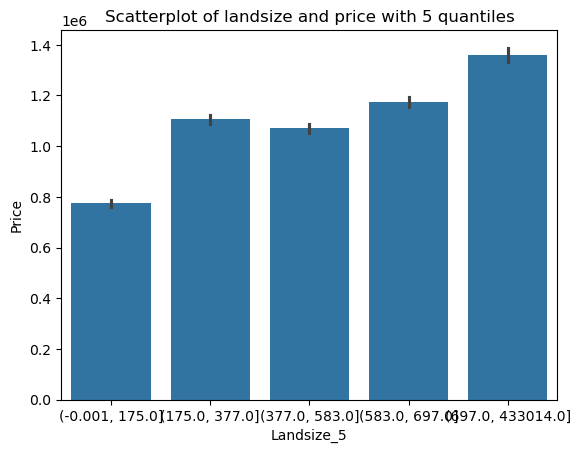

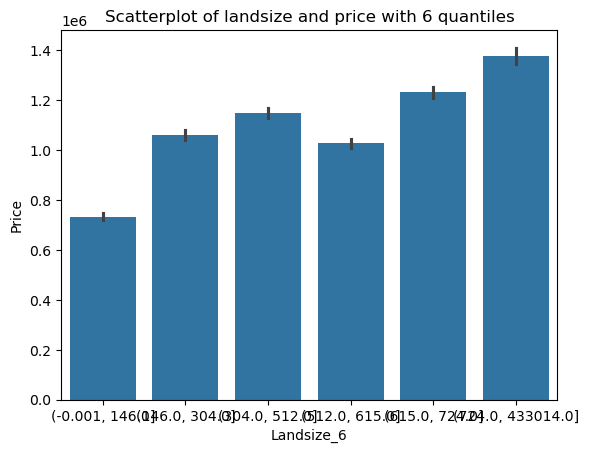

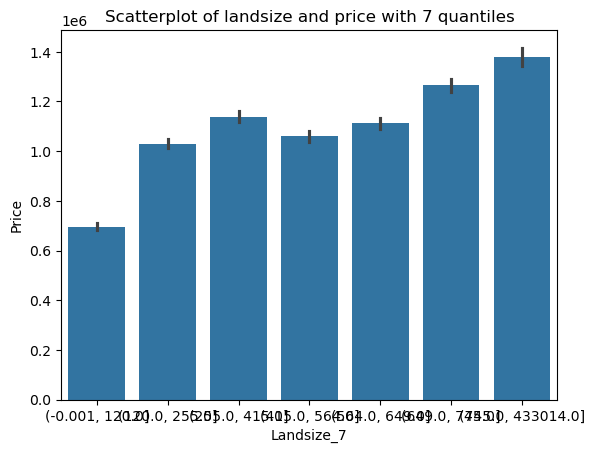

In [18]:
# Test if there's difference in the correlation if we change the number of groups

# List of quantiles
quantiles = [3, 4, 5, 6, 7]

# Foor loop to calculate the Spearman correlation and visualization for each quantile 
for q in quantiles:

    # Create the new column with the categories
    df[f'Landsize_{q}'] = pd.qcut(df['Landsize'], q=q)
    
    #Create a barplot to visualize how the relation changes with the number of quantiles
    sns.barplot(x=f'Landsize_{q}', y='Price', data=df)
    plt.title(f'Scatterplot of landsize and price with {q} quantiles')
    plt.show()

# Percentage of outliers in price

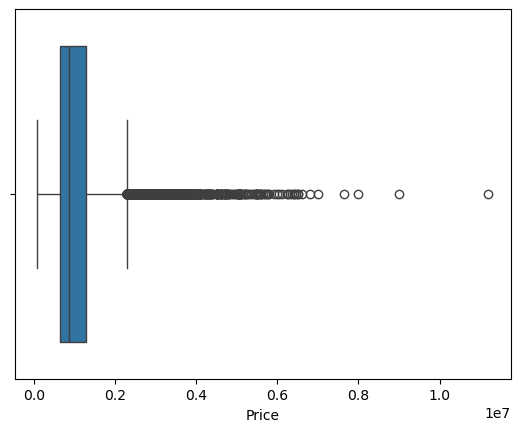

{'The percentage of outliers is': 4.71244540683378}


In [22]:
#Calculate Q1, Q3 and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define limits with Turkey method
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#Create a boxplot to visualize the outliers
sns.boxplot(x=df['Price'])
plt.show()

# Remove outliers
df_filtered = df[(df['Price'] > lower_limit) & (df['Price'] < upper_limit)]

# Calculate the difference between the original dataframe and the filtered dataframe to know the number of outliers
num_outliers = len(df) - len(df_filtered)
percentage_outliers = (num_outliers / len(df)) * 100

print({'The percentage of outliers is':percentage_outliers})

# Property price distribution

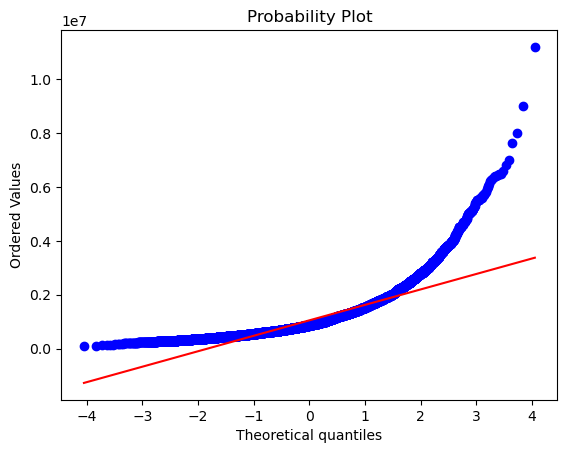

{'The skewness of price is': 2.5889693410528594, 'The kurtosis of price is': 13.097200515556374}


In [25]:
import scipy.stats as stats

stats.probplot(df['Price'], dist="norm", plot=plt)
plt.show()

price_skewness = df['Price'].skew()
price_kurtosis = df['Price'].kurtosis()

print({'The skewness of price is':price_skewness, 'The kurtosis of price is':price_kurtosis})

# Normality test for price

In [26]:
k_s_stat, p_value = stats.kstest(df['Price'], 'norm')

print({'The KS statistic is':k_s_stat, 'The p-value is':p_value})

{'The KS statistic is': 1.0, 'The p-value is': 0.0}


# Relation between price and property type

<Axes: xlabel='Type', ylabel='Price'>

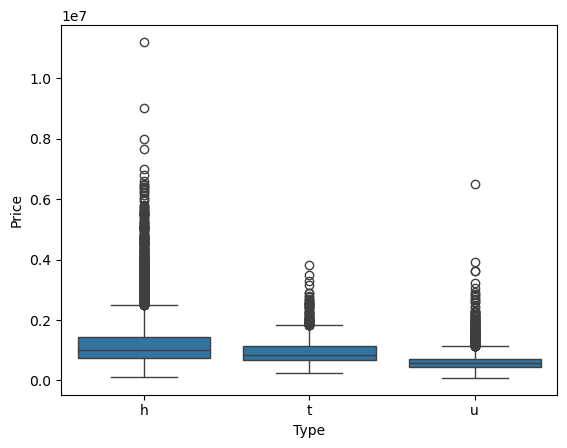

In [27]:
#Create a boxplot to visualize the relation between property type and price
sns.boxplot(x='Type', y='Price', data=df)

# Most expensive and cheapest regions

In [29]:
# Calculate the median price for each region to know which region is more expensive and which is cheaper
most_expensive = df.groupby('Regionname')['Price'].median().sort_values(ascending=False).index[0]
cheaper = df.groupby('Regionname')['Price'].median().sort_values(ascending=False).index[-1]

print({'The most expensive region is':most_expensive, 'The cheaper region is':cheaper})

{'The most expensive region is': 'Southern Metropolitan', 'The cheaper region is': 'Western Victoria'}


# Association between region and price

In [35]:
# First we categorize the price into five groups
df['Price_category'] = pd.qcut(df['Price'], q=5, labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# Create a crosstab to apply the chi-squared test
region_price = pd.crosstab(df['Regionname'], df['Price_category'])

# Use chi-squared test to test the association between region and price 
chi2, p_value, _, _ = stats.chi2_contingency(region_price)

print({'The chi-squared stat is':chi2, 'The p-value is':p_value})

# Use Cramer's V test to test the association between property type and price
n = region_price.sum().sum()
cramers_v = np.sqrt((chi2 / n) / (min(region_price.shape) - 1))
print({'The Cramers V is':cramers_v})

{'The chi-squared stat is': 5728.727443613416, 'The p-value is': 0.0}
{'The Cramers V is': 0.2292786672838293}


# Difference of median price between earliest and latest year

In [39]:
#Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Create a new column with the year
df['Year'] = df['Date'].dt.year

# Calculate the earliest and latest year
earliest_year = df['Year'].min()
latest_year = df['Year'].max()

# Calculate median for each year
median_earliest_year = df[df['Year'] == earliest_year]['Price'].median()
median_latest_year = df[df['Year'] == latest_year]['Price'].median()

percentage = ((median_latest_year - median_earliest_year) / median_earliest_year) * 100

print({'The percentage is':percentage})

{'The percentage is': -5.480225988700565}


# Month with more sales

In [40]:
# Create a new column with the month
df['Month'] = df['Date'].dt.month

# Calculate the month with more sales
month_most_sales = df['Month'].mode()[0]

print({'The month with the most sales is':month_most_sales})

{'The month with the most sales is': 11}
